In [ ]:
import pandas as pd
import pickle
import numpy as np

In [ ]:
import pandas as pd

filename = '/content/drive/MyDrive/448 - Project/RookieInterviews_2006_2022.pkl'
objects = []
with (open(filename, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
data = objects[0]

In [ ]:
newdata = {'name': [], 'year': [], 'text' :[], 'link':[]}

for year in objects[0].keys():
  for player in objects[0][year].keys():
    objects[0][year][player]['text'] = objects[0][year][player]['text'].replace('\n', ' ')
    objects[0][year][player]['text'] = objects[0][year][player]['text'].replace('\t', ' ')
    newdata['name'].append(player)
    newdata['year'].append(year)
    newdata['text'].append(objects[0][year][player]['text'])
    newdata['link'].append(objects[0][year][player]['link'])

In [ ]:
print(data)
new = pd.DataFrame.from_dict(newdata)
print(new)

{2006: {'Shelden Williams': {'link': 'http://www.asapsports.com/show_interview.php?id=38441', 'text': "Q.  Going to Atlanta, any reaction?   SHELDEN WILLIAMS:  It feels great.  I mean, Atlanta is not too far from Duke.  I feel truly blessed being in this situation.  I think it's going to be a great experience, and I'm ready to go out there and work right now.    Q.  What was it like sitting in there, everybody else is kind of wondering what's going to happen.  You were the one player that all of the projections seemed to be right, you going to Atlanta.  Did you have a good feeling sitting in there thinking that's where you were going?   SHELDEN WILLIAMS:  I didn't have a good feeling until I found out.  People can say a lot of things, but until your name gets called out, that's the sure thing.  There's no guarantee or anything like that.  Like I said anything can change, last-minute trade and things like that.   I went out there wide-eyed just like everybody else and waited for my name

In [ ]:
print(new['year'][188])

for index, row in new.iterrows():
  print(index, row['name'])
players = new.copy()
#players = players.drop([229, 188])
players.drop([229,188], inplace=True)
new.drop([229, 188], inplace=True)
players = players.drop(columns=['text', 'link'])
print(players)
for index, row in players.iterrows():
  print(index, row['name'])

In [ ]:
players.to_csv('/content/drive/MyDrive/448 - Project/RookiePlayers_2006_2022.csv', index=False)

In [ ]:
qas = []
for index, row in new.iterrows():
  qas.append(row['text'].count('Q.'))
new["QA_pair_count"] = qas

In [ ]:
import matplotlib.pyplot as plt

In [ ]:



column_name = 'QA Pair Count'
column_data = new['QA_pair_count']

Q3 = np.quantile(column_data, 0.75)
Q1 = np.quantile(column_data, 0.25)

print(Q1, Q3)



5.0 11.0


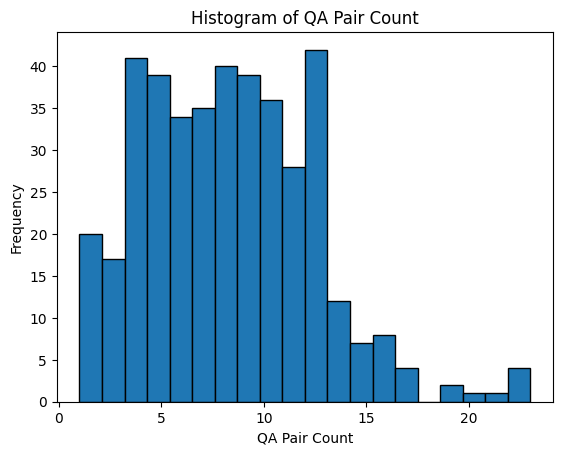

In [ ]:
plt.hist(column_data, bins=20, edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [ ]:
column_data.mean()

8.273170731707317

In [ ]:
print(column_data[column_data == 1] )
print(new['link'][407] )

34     1
175    1
238    1
253    1
259    1
264    1
284    1
320    1
333    1
407    1
411    1
Name: QA_pair_count, dtype: int64
http://www.asapsports.com/show_interview.php?id=177718


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
len(new)

410

In [ ]:
sentence_count = []
for index, row in new.iterrows():
  sentences = sent_tokenize(row['text'])
  sentence_count.append(len(sentences))
new["Sentence Count"] = sentence_count

In [ ]:
column_name = 'Sentence Count'
column_data = new[column_name]


Q3 = np.quantile(column_data, 0.75)
Q1 = np.quantile(column_data, 0.25)

print(Q1, Q3)



21.25 59.0


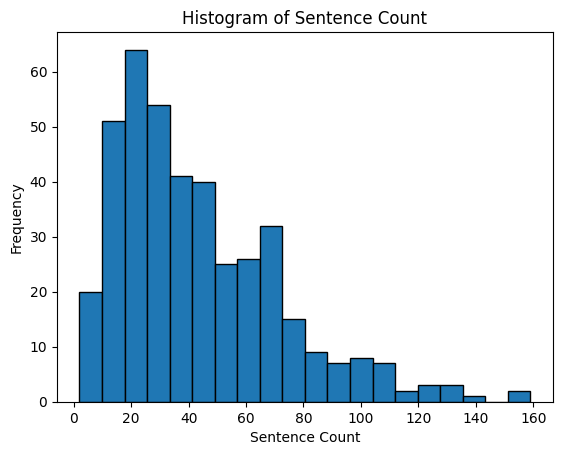

43.3390243902439

In [ ]:
plt.hist(column_data, bins=20, edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()
column_data.mean()

In [ ]:
def histogram_of_count(df, column_name, bins):
  column_data = new[column_name]
  plt.hist(column_data, bins=bins, edgecolor='black')
  plt.title('Histogram of ' + column_name)
  plt.xlabel(column_name)
  plt.ylabel('Frequency')
  plt.show()
  Q3 = np.quantile(column_data, 0.75)
  Q1 = np.quantile(column_data, 0.25)
  print(f"Min: {column_data.min()}")
  print(f"Q1: {Q1}")
  
  print(f"Median: {column_data.median()}")
  print(f"Q3: {Q3}")
  print(f"Max: {column_data.max()}")
  print(f"IQR: {Q3 - Q1}")
  print(f"Mean: {column_data.mean()}")



In [ ]:
def text_to_count(df, c_name):
  word_dict = {}
  for index, row in df.iterrows():
    list_of_words = row[c_name].split(" ")
    for word in list_of_words:
      if word in word_dict:
          word_dict[word] += 1
      else:
          word_dict[word] = 1

  return word_dict

In [ ]:
def count_common_occurance(df, word_dict, c_name, new_c_name, occurances):
  # return df
  list_occurances = []
  #print(len(df))
  for index, row in df.iterrows():
    list_of_words = row[c_name].split(" ")
    current_count = 0
    for word in list_of_words:
      if word in word_dict and word_dict[word] >= occurances:
        current_count += 1
    list_occurances.append(current_count)

  df[new_c_name] = list_occurances
  return df

In [ ]:
print(len(new))
print(len(new["text"].unique()))
print(new['text'][228])

410
410
Q. What was it like to sit there and wait and even guys coming out of the stands picked and going to the stage? SKAL LABISSIERE: It was tough at first, but one thing about the league, one thing about all of us now, everything starts over for all of us.  We all start over once we get to that level.  I'm excited to get to work.  I know I have a bright future ahead of me. Q. And you said yesterday that you thought maybe five years from now you could be considered the best player in the draft.  How much did this experience maybe shape that belief? SKAL LABISSIERE: I still believe it.  I'm about to go to work, so I'm going to control what I can control. Q. Sacramento was a team that had expressed a lot of interest in you.  The idea of being in Sacramento with DeMarcus, another Kentucky guy, how do you think the fit is? SKAL LABISSIERE: I think it's going to be a good fit learning from DeMarcus Cousins, Willie Cauley-Stein is there and I know him pretty well.  Rajon Rondo, who's a re

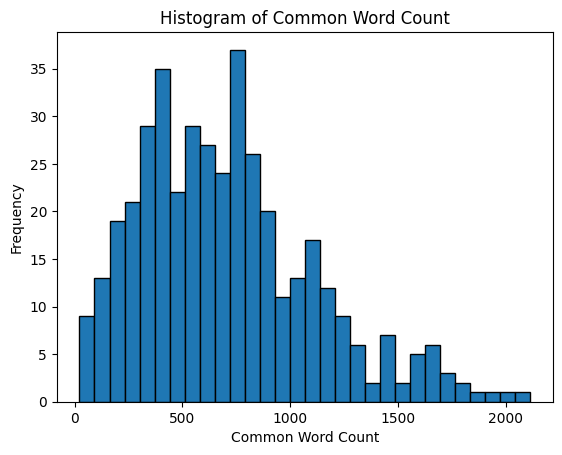

Min: 22
Q1: 400.75
Median: 653.0
Q3: 912.75
Max: 2115
IQR: 512.0
Mean: 703.7219512195122


In [ ]:
raw_word_dict = text_to_count(new, "text")
new = count_common_occurance(new, raw_word_dict, "text", "Common Word Count", occurances = 1)
histogram_of_count(new, "Common Word Count", 30)

In [ ]:
import re
import unicodedata

In [ ]:
# pattern = r'[^a-zA-Z0-9\s]'
# remove_special_chars = lambda x: re.sub(pattern, '', x)
# new['text'] = new['text'].apply(remove_special_chars)

# def remove_non_english_chars(text):
#     """
#     This function removes all non-English characters from a string.
#     """
#     # create an empty string to hold the result
#     result = ""

#     # iterate over each character in the string
#     for char in text:
#         try:
#             # check whether the character is in the Latin script
#             if unicodedata.name(char).startswith(('LATIN', 'SPACE')):
#                 result += char
#         except:
#             pass
    # return result

def remove_non_english_chars(text):
    """
    This function removes all non-English characters from a string.
    """
    # create an empty string to hold the result
    bytes_text = text.encode('ascii', 'ignore')
    return  bytes_text.decode()




new['No Special Char'] = new['text'].apply(remove_non_english_chars)


In [ ]:
new['text'][136]
new['No Special Char'][136]


"Q. Andr, if you can start with some opening comments about being drafted by the piss sons.  ANDR DRUMMOND: Speechless, really. It's a great opportunity for me. It's a dream come true, growing up as a little kid hearing my name being called and shaking David Stern's hand. I just feel great.   Q. Talk about how you're looking forward to play with good, young players like Brandon Knight and how you'll grow together?  ANDR DRUMMOND: I know we'll build a great team chemistry right away. It's a great organization and the fans are great up there. I just can't wait to be a part of the team.   Q. Do you see yourself as the center on the team or is Greg Monroe the center?  ANDR DRUMMOND: I see myself wherever coach puts me is wherever I'm going to work my hardest at.  Q. Not sure how much you even paid attention to all of the talk this week or what your agent was telling you all week. Is this now just a sense of relief and pretty emotional?  ANDR DRUMMOND: Yeah, I mean, I talked to Detroit; I a

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    # Join the remaining words back into a string
    text = " ".join(words)
    return text

In [ ]:
new['preprocessed_text'] = new['No Special Char'].apply(preprocess_text)

In [ ]:
new['preprocessed_text'][136]

'q andr start opening comments drafted piss sons andr drummond speechless really great opportunity dream come true growing little kid hearing name called shaking david sterns hand feel great q talk youre looking forward play good young players like brandon knight youll grow together andr drummond know well build great team chemistry right away great organization fans great cant wait part team q see center team greg monroe center andr drummond see wherever coach puts wherever im going work hardest q sure much even paid attention talk week agent telling week sense relief pretty emotional andr drummond yeah mean talked detroit actually worked day draft actually told liked lot still would definitely take 8th pick went right broke tears knew going get called next q said detroit worked day others said teams didnt work rhyme reason trying figure workouts mean anything andr drummond every work means everything need go showcase team sometimes might position looking always good take look every w

In [ ]:
word_count = []
for index, row in new.iterrows():
  all_words = row["preprocessed_text"].split(" ")
  word_count.append(len(all_words))
new["Word Count"] = word_count

In [ ]:
column_name = 'Word Count'
column_data = new[column_name]

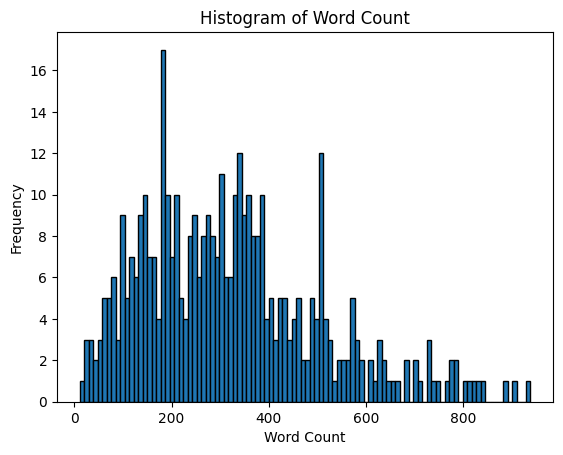

321.29024390243904

In [ ]:
plt.hist(column_data, bins=100, edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()
column_data.mean()

In [ ]:
#print(new[new['Preprocessed Common Word Count'] == 7]['link'])
#print(new['link'][175])

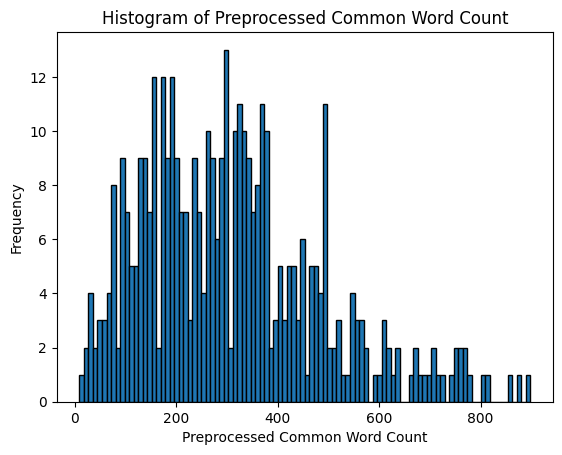

Min: 9
Q1: 176.0
Median: 290.5
Q3: 408.0
Max: 898
IQR: 232.0
Mean: 310.2829268292683


In [ ]:
preprocess_word_dict = text_to_count(new, "preprocessed_text")
new = count_common_occurance(new, preprocess_word_dict, "preprocessed_text", "Preprocessed Common Word Count", occurances = 3)
histogram_of_count(new, "Preprocessed Common Word Count", 100)

In [ ]:
dict_size = 0
for counts in preprocess_word_dict.values():
  if counts >= 1:
    dict_size += 1
print(dict_size)

7062


In [ ]:
names = new['name'].apply(preprocess_text)
split_names = names.str.split(' ')
first_names = split_names.str.get(0)
last_names = split_names.str.get(1)
print(list(first_names))

['shelden', 'marcus', 'tyrus', 'cedric', 'saer', 'thabo', 'brandon', 'jj', 'oleksiy', 'patrick', 'adam', 'rudy', 'randy', 'rodney', 'andrea', 'hilton', 'lamarcus', 'nick', 'brandan', 'julian', 'al', 'rodney', 'gabe', 'greg', 'joakim', 'acie', 'petteri', 'yi', 'al', 'spencer', 'jeff', 'kevin', 'mike', 'wilson', 'corey', 'marco', 'stanko', 'arron', 'russell', 'brandon', 'derrick', 'anthony', 'oj', 'kevin', 'brook', 'robin', 'deandre', 'serge', 'eric', 'danilo', 'joey', 'mario', 'michael', 'jerryd', 'nicolas', 'dj', 'darrell', 'joe', 'alexis', 'terrence', 'hasheem', 'ricky', 'jonas', 'brandon', 'jrue', 'jordan', 'gerald', 'james', 'tyler', 'blake', 'jonny', 'christian', 'tyreke', 'demar', 'austin', 'stephen', 'darren', 'rodrigue', 'hassan', 'john', 'greivis', 'ekpe', 'evan', 'kevin', 'tibor', 'patrick', 'greg', 'wesley', 'xavier', 'gordon', 'paul', 'tiny', 'derrick', 'ed', 'demarcus', 'luke', 'alfarouq', 'cole', 'derrick', 'kemba', 'nikola', 'jan', 'jonas', 'klay', 'tristan', 'chris', 'da

In [ ]:

occurances = 3
all_replaced = []
all_removed = []
number_unk = []
total_words = []

for index, row in new.iterrows():
  
  ReplacedText = []
  RemovedText = []
  current_unk = 0
  current_total = 0

  all_words = row["preprocessed_text"].split(" ")
  for word in all_words:
    current_total += 1
    if word in preprocess_word_dict and preprocess_word_dict[word] >= 3 and (word not in list(first_names)) and (word not in list(last_names)):
      RemovedText.append(word)
      ReplacedText.append(word)
    #elif  word in list(first_names):
      #print(f"Found name {word}")
    else:
      ReplacedText = ["unk"]
      current_unk += 1
  
  RepText =  " ".join(ReplacedText)
  RemText = " ".join(RemovedText)
  all_replaced.append(RepText)
  all_removed.append(RemText)
  number_unk.append(current_unk)
  total_words.append(current_total)


new["replaced_text"] = all_replaced
new["removed_text"] = all_removed
new["Number UNK"] = number_unk
new["Total Words"] = total_words
res = [i / j for i, j in zip(number_unk, total_words)]
new["Percent UNK"] = res

In [ ]:
new["removed_text"][0]

'q going atlanta reaction feels great mean atlanta far duke feel truly blessed situation think going great experience im ready go work right q like sitting everybody else kind wondering whats going happen one player seemed right going atlanta good feeling sitting thinking thats going didnt good feeling found people say lot things name gets called thats sure thing theres guarantee anything like like said anything change trade things like went like everybody else waited name called fortunately called atlanta grateful q youre going athletic team going bring atlanta hawks thing ive done four years college im defensive player afraid bang people physical im rebounder also lowpost presence thats something ive done four years duke something continue next level atlanta q didnt work hawks think caught eye body work four years duke else saw im know way play style play think something team needed somebody could rebound b thats something fit pretty well lot interest drafted q basically duke graduat

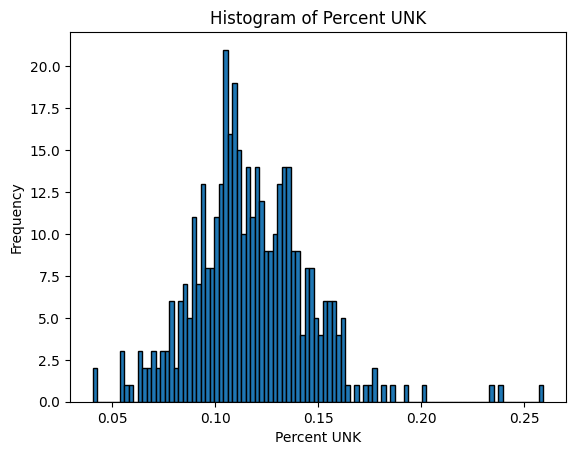

Min: 0.04054054054054054
Q1: 0.1001004016064257
Median: 0.1152839307289569
Q3: 0.13445928253469494
Max: 0.25925925925925924
IQR: 0.034358880928269234
Mean: 0.11734228980238716


In [ ]:
histogram_of_count(new, "Percent UNK", 100)

In [ ]:
sorted_items = sorted(preprocess_word_dict.items(), key=lambda x: x[1], reverse=True)

# get the top 10 items
top_10_items = sorted_items[:50]

# get the keys of the top 10 items
top_10_keys = [item[0] for item in top_10_items]

print(top_10_keys)
print(preprocess_word_dict["john"])

['q', 'im', 'going', 'like', 'think', 'know', 'lot', 'really', 'get', 'team', 'great', 'play', 'thats', 'feel', 'go', 'work', 'nba', 'game', 'good', 'guys', 'got', 'youre', 'one', 'playing', 'right', 'well', 'yeah', 'hes', 'player', 'talk', 'excited', 'first', 'want', 'able', 'definitely', 'year', 'kind', 'ive', 'time', 'said', 'much', 'see', 'basketball', 'players', 'bring', 'coach', 'would', 'things', 'come', 'hard']
66


In [ ]:
from wordcloud import WordCloud

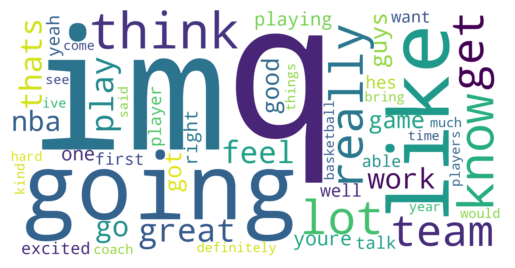

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(preprocess_word_dict)

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **TF-IDF calculate**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data to calculate the TF-IDF unigram scores
tfidf_unigrams = tfidf_vectorizer.fit_transform(new['removed_text'])

# get the feature names (i.e., the unigrams)
#x_array = 
#print(tfidf_unigrams.toarray())
unigrams = tfidf_vectorizer.get_feature_names_out()


# create a Pandas dataframe to store the TF-IDF unigram scores
tfidf_unigram_df = pd.DataFrame(tfidf_unigrams.toarray(), columns=unigrams)

In [ ]:
tfidf_unigram_df.head()

,10,100,10th,11,110,11th,12,13,14,14th,...,younger,youngest,youre,youth,youve,yugoslavia,zealand,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.019754,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.039989,0.0,0.064091,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.088061,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115485,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.037828,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


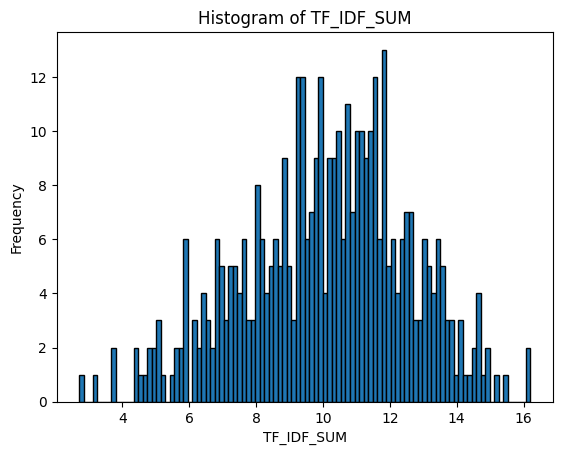

Min: 2.7190779541804067
Q1: nan
Median: 10.285361811416482
Q3: nan
Max: 16.202530305930193
IQR: nan
Mean: 10.082562708952922


In [ ]:
new["TF_IDF_SUM"] = tfidf_unigram_df.sum(axis=1)
histogram_of_count(new, "TF_IDF_SUM", 100)

In [ ]:
tfidf_vectorizer_bi = TfidfVectorizer(ngram_range = (2,2))

# fit and transform the text data to calculate the TF-IDF unigram scores
tfidf_bigrams = tfidf_vectorizer_bi.fit_transform(new['removed_text'])

# get the feature names (i.e., the unigrams)
#x_array = 
#print(tfidf_unigrams.toarray())
bigrams = tfidf_vectorizer_bi.get_feature_names_out()


# create a Pandas dataframe to store the TF-IDF unigram scores
tfidf_bigram_df = pd.DataFrame(tfidf_bigrams.toarray(), columns=bigrams)

In [ ]:
tfidf_bigram_df.head()

,10 11,10 12,10 15,10 20,10 actually,10 area,10 atlanta,10 blessing,10 come,10 days,...,zone 23,zone curious,zone going,zone got,zoom call,zoom feel,zoom interviews,zoom meeting,zoom multiple,zoom person
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


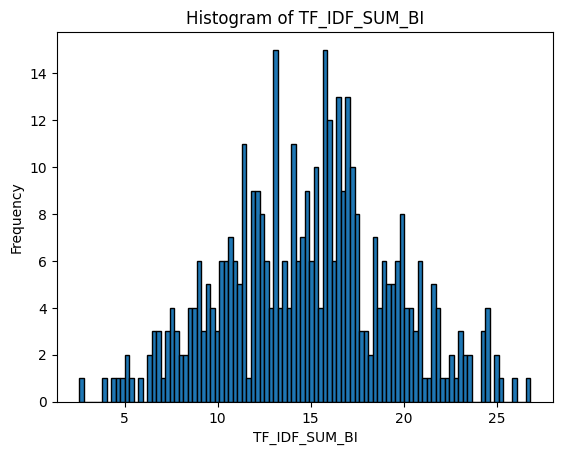

Min: 2.576810974970228
Q1: nan
Median: 15.05926211644385
Q3: nan
Max: 26.801573285116607
IQR: nan
Mean: 14.865078585386122


In [ ]:
new["TF_IDF_SUM_BI"] = tfidf_bigram_df.sum(axis=1)
histogram_of_count(new, "TF_IDF_SUM_BI", 100)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# **Clustering TF-IDF with above or below average**

In [ ]:
#Go through all the NBA csv files and get the average of performance metrics.
# Then go to new and add AoB for each metric. Then do clustering as ChatGPT said.
#AllHailChatGPT

In [ ]:
new.head()

,name,year,text,link,QA_pair_count,Sentence Count,Common Word Count,No Special Char,preprocessed_text,Word Count,Preprocessed Common Word Count,replaced_text,removed_text,Number UNK,Total Words,Percent UNK,TF_IDF_SUM,TF_IDF_SUM_BI
0,Shelden Williams,2006,"Q. Going to Atlanta, any reaction? SHELDEN ...",http://www.asapsports.com/show_interview.php?i...,7,43,701,"Q. Going to Atlanta, any reaction? SHELDEN ...",q going atlanta reaction shelden williams feel...,310,298,unk heavy wanted come back get degree finish s...,q going atlanta reaction feels great mean atla...,27,310,0.087097,10.290812,15.607177
1,Marcus Williams,2006,"Q. How do you feel about dropping, most peopl...",http://www.asapsports.com/show_interview.php?i...,9,46,679,"Q. How do you feel about dropping, most peopl...",q feel dropping people expected go higher emot...,297,290,unk cant say havent played game yet think mind...,q feel dropping people expected go higher emot...,27,297,0.090909,10.398053,15.157392
2,Tyrus Thomas,2006,"Q. Talk to me about, it's been a long evening...",http://www.asapsports.com/show_interview.php?i...,5,28,417,"Q. Talk to me about, it's been a long evening...",q talk long evening finally get sitting backst...,166,159,unk youve got understand situation know got ne...,q talk long evening finally get sitting backst...,20,166,0.120482,7.686513,11.282783
3,Cedric Simmons,2006,Q. I guess it must be exciting to go to New O...,http://www.asapsports.com/show_interview.php?i...,2,8,126,Q. I guess it must be exciting to go to New O...,q guess must exciting go new orleans family pr...,58,54,unk state new orleans runs also kind know offe...,q guess must exciting go new orleans family pr...,6,58,0.103448,4.380863,6.312437
4,Saer Sene,2006,Q. There was a lot of attention on the first ...,http://www.asapsports.com/show_interview.php?i...,4,15,176,Q. There was a lot of attention on the first ...,q lot attention first draft pick came italy te...,78,76,unk yeah im excited thats true im play okay,q lot attention first draft pick came italy te...,11,78,0.141026,4.751420,7.549475


In [ ]:
import os
import pandas as pd

# Set the directory path
dir_path = "/content/drive/MyDrive/448 - Project/good ones/"

# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame()

# Loop through each file in the directory
for file_name in os.listdir(dir_path):

    # Check if the file is a csv or number file
    if file_name.endswith('.csv') or file_name.endswith('.number'):
        print(file_name)
        # Read the file into a pandas dataframe
        file_path = os.path.join(dir_path, file_name)
        df = pd.read_csv(file_path) if file_name.endswith('.csv') else pd.read_csv(file_path, header=None)

        # Combine the data with the existing data in the combined dataframe
        combined_df = pd.concat([combined_df, df], axis=0, ignore_index=True)

# Drop duplicates
combined_df = combined_df.drop_duplicates(subset=combined_df.columns, keep='first')

# Print the combined dataframe
print(combined_df.head())

ROOKIES 2001 - 2002 2.csv
ROOKIES 2002 - 2003  2 .csv
ROOKIES 2003 - 2004  2 2.csv
ROOKIES 2004 - 2005  2 2.csv
ROOKIES 2005 - 2006 2 2.csv
ROOKIES 2006 - 2007  2 2.csv
ROOKIES 2007 -2008 2 2.csv
ROOKIES 2008 - 2009 2 2.csv
ROOKIES 2009 -2010 2 2.csv
ROOKIES 2010 - 2011 2 2.csv
ROOKIES 2011 -2011 2 2.csv
ROOKIES 2012 -2013 2 2.csv
ROOKIES 2013 -2014 3 2.csv
ROOKIES 2014 -2015 2 2.csv
ROOKIES 2015-2016 2 2.csv
ROOKIES 2016-2017 2 2.csv
ROOKIES 2018-2019 2 2.csv
ROOKIES 2020-2021 2.csv
ROOKIES 2017-2018 2 2.csv
rookiesre2021-2022.csv
ROOKIES 2019-2020 2 2.csv
             PLAYER TEAM  AGE  GP   W   L   MIN   PTS  FGM   FGA  ...  AST  \
0         Pau Gasol  MEM   21  82  23  59  36.6  17.6  6.7  13.0  ...  2.7   
1     Shane Battier  MEM   23  78  23  55  39.7  14.4  5.3  12.3  ...  2.8   
2  Jason Richardson  GSW   21  80  21  59  32.8  14.4  5.8  13.6  ...  3.0   
3    Gilbert Arenas  GSW   20  47  10  37  24.5  10.9  3.7   8.2  ...  3.7   
4  Andrei Kirilenko  UTA   21  82  44  38  26.

In [ ]:
combined_df = combined_df.rename(columns={'PLAYER': "name"})

In [ ]:
Morethan2017 = new[ new["year"] >= 2017]
Smalldat = new

In [ ]:
merged_df = pd.merge(new, combined_df, on="name")
print(merged_df.head())

               name  year                                               text  \
0  Shelden Williams  2006  Q.  Going to Atlanta, any reaction?   SHELDEN ...   
1   Marcus Williams  2006  Q.  How do you feel about dropping, most peopl...   
2      Tyrus Thomas  2006  Q.  Talk to me about, it's been a long evening...   
3    Cedric Simmons  2006  Q.  I guess it must be exciting to go to New O...   
4   Thabo Sefolosha  2006  Q.  What did you feel when you heard your name...   

                                                link  QA_pair_count  \
0  http://www.asapsports.com/show_interview.php?i...              7   
1  http://www.asapsports.com/show_interview.php?i...              9   
2  http://www.asapsports.com/show_interview.php?i...              5   
3  http://www.asapsports.com/show_interview.php?i...              2   
4  http://www.asapsports.com/show_interview.php?i...              3   

   Sentence Count  Common Word Count  \
0              43                701   
1           

In [ ]:
print(len(combined_df))
print(len(merged_df))
print(len(new))
print(Smalldat[~Smalldat['name'].isin(merged_df['name'])]['name'])
print(sum(merged_df["name"] == "Justin Patton"))
print(sum(Smalldat["name"] == "Justin Patton"))
print(sum(combined_df["name"] == "Justin Patton"))

1050
271
410
4             Saer Sene
7           J.J. Redick
9      Patrick O'Bryant
25          Acie Law IV
26      Petteri Koponen
             ...       
407     Christian Braun
408      Malaki Branham
409    MarJon Beauchamp
410      Paolo Banchero
411        Ochai Agbaji
Name: name, Length: 139, dtype: object
0
1
0


In [ ]:
print(print(len([merged_df['year'] == 2021])))

0
None


In [ ]:
new[new['year'] == 2021]

,name,year,text,link,QA_pair_count,Sentence Count,Common Word Count,No Special Char,preprocessed_text,Word Count,Preprocessed Common Word Count,replaced_text,removed_text,Number UNK,Total Words,Percent UNK,TF_IDF_SUM,TF_IDF_SUM_BI
363,Ziaire Williams,2021,"Q. Ja Morant, that's going to be your teammate...",http://www.asapsports.com/show_interview.php?i...,5,55,750,"Q. Ja Morant, that's going to be your teammate...",q ja morant thats going teammate think ziaire ...,360,349,unk greats going hell experience sure im takin...,q thats going teammate think hey know lob im g...,39,360,0.108333,10.863529,16.388193
364,Franz Wagner,2021,Q. What does it feel like to you that you now ...,http://www.asapsports.com/show_interview.php?i...,13,69,845,Q. What does it feel like to you that you now ...,q feel like play brother mo franz wagner mean ...,387,376,unk german basketball player,q feel like play brother mo mean dont know hes...,53,387,0.136951,14.198296,20.470570
365,Cameron Thomas,2021,Q. Can you take us through the process with th...,http://www.asapsports.com/show_interview.php?i...,8,67,854,Q. Can you take us through the process with th...,q take us process nets throughout draft proces...,382,372,unk came spoke one camps forget camp thats pro...,q take us process nets throughout draft proces...,44,382,0.115183,6.709746,10.470974
366,Jalen Suggs,2021,Q. They selected Cole Anthony last year. He a...,http://www.asapsports.com/show_interview.php?i...,10,86,1129,Q. They selected Cole Anthony last year. He a...,q selected cole anthony last year averaged 129...,525,495,unk possible goes works thats want,q selected last year points per game theres lo...,58,525,0.110476,9.201310,12.613294
367,Alperen Sengun,2021,"Q. From a fit standpoint, how do you see yours...",http://www.asapsports.com/show_interview.php?i...,4,23,317,"Q. From a fit standpoint, how do you see yours...",q fit standpoint see fitting lineup houston ch...,133,131,unk workout agent communication,q fit standpoint see fitting lineup houston wo...,12,133,0.090226,11.972220,18.323839
368,Moses Moody,2021,Q. When you woke up this morning on draft morn...,http://www.asapsports.com/show_interview.php?i...,5,24,465,Q. When you woke up this morning on draft morn...,q woke morning draft morning expect put hat go...,191,189,unk im extremely excited like play obviously w...,q woke morning draft morning expect put hat go...,15,191,0.078534,10.755570,17.315154
369,Evan Mobley,2021,Q. With the Cavs also having Jarrett Allen on ...,http://www.asapsports.com/show_interview.php?i...,12,67,1014,Q. With the Cavs also having Jarrett Allen on ...,q cavs also jarrett allen roster see fit two c...,462,450,unk great hes since day one way coaching hes c...,q cavs also roster see fit two could learn cen...,61,462,0.132035,11.818550,20.655067
370,Davion Mitchell,2021,Q. I know today's only day one of you coming i...,http://www.asapsports.com/show_interview.php?i...,9,57,873,Q. I know today's only day one of you coming i...,q know todays day one coming nba legacy want l...,390,377,unk enjoy teaching others live brought us toge...,q know day one coming nba legacy want leave be...,40,390,0.102564,11.018204,15.817014
371,Jonathan Kuminga,2021,Q. You're playing with the Warriors but how wi...,http://www.asapsports.com/show_interview.php?i...,10,57,1246,Q. You're playing with the Warriors but how wi...,q youre playing warriors use physical capabili...,585,569,unk got bring every time get game got player n...,q youre playing warriors use physical power in...,51,585,0.087179,9.003827,13.048632
372,Corey Kispert,2021,Q. What was kind of the lead-up to tonight lik...,http://www.asapsports.com/show_interview.php?i...,7,40,701,Q. What was kind of the lead-up to tonight lik...,q kind leadup tonight like find going pick cor...,326,312,unk better learning guy like help,q kind leadup tonight like find going pick yea...,36,326,0.110429,10.818347,16.047307


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range =(2,2))

# fit and transform the text data to calculate the TF-IDF unigram scores
tfidf_unigrams = tfidf_vectorizer.fit_transform(merged_df['removed_text'])

# get the feature names (i.e., the unigrams)
#x_array = 
#print(tfidf_unigrams.toarray())
unigrams = tfidf_vectorizer.get_feature_names_out()


# create a Pandas dataframe to store the TF-IDF unigram scores
tfidf_unigram_df = pd.DataFrame(tfidf_unigrams.toarray(), columns=unigrams)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(tfidf_unigram_df)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
merged_df['cluster'] = cluster_labels
print(tfidf_vectorizer.vocabulary_)
new_dict = dict([(value, key) for key, value in tfidf_vectorizer.vocabulary_.items()])
print(new_dict)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

Performance = ["FG%", "PR", "3P%", "PF", "PTS"]

for perf in Performance:
  merged_df[f"AoB{perf}"] = (merged_df[perf] > merged_df[perf].median()).astype(int)

In [ ]:
from sklearn.metrics import adjusted_rand_score



cluster_centers = kmeans.cluster_centers_
#print(cluster_centers)
n_top_features = 10

print(f"Number of above average labels: {sum(cluster_labels)}")
print(f"Percent above average labels: {sum(cluster_labels) / len(cluster_labels)}")
top_features = np.argsort(-cluster_centers, axis=1)[:, :n_top_features]
#print(top_features)

for perf in Performance:
  ari = adjusted_rand_score(merged_df[f"AoB{perf}"], cluster_labels)
  # Print the adjusted Rand score
  #print(f'Adjusted Rand score for: {:.2f}'.format(ari))
  print(f"'Adjusted Rand score for {perf}: {ari}")







for i in top_features:
  print(f"Label {i}")
  for j in i:
    print(new_dict[j])

Number of above average labels: 127
Percent above average labels: 0.46863468634686345
'Adjusted Rand score for FG%: -0.0006277646253826702
'Adjusted Rand score for PR: 0.0077468630748164895
'Adjusted Rand score for 3P%: 0.007790978586609732
'Adjusted Rand score for PF: -0.003362094341011112
'Adjusted Rand score for PTS: 0.0012308920774945595
Label [12369 19740 48163 19768 23523 24062 19867 19780 27678  9386]
feel like
im excited
youre going
im going
like said
looking forward
im really
im happy
new york
dont know
Label [19768 24062 46646 19780 19814 48163 15635  9386 31569 27663]
im going
looking forward
work hard
im happy
im looking
youre going
going go
dont know
point guard
new orleans


In [ ]:
merged_df.head()
#sum(merged_df["cluster"] == 1)

,name,year,text,link,QA_pair_count,Sentence Count,Common Word Count,No Special Char,preprocessed_text,Word Count,...,DD2,TD3,+/-,PR,cluster,AoBFG%,AoBPR,AoB3P%,AoBPF,AoBPTS
0,Shelden Williams,2006,"Q. Going to Atlanta, any reaction? SHELDEN ...",http://www.asapsports.com/show_interview.php?i...,7,43,701,"Q. Going to Atlanta, any reaction? SHELDEN ...",q going atlanta reaction shelden williams feel...,310,...,8.0,0.0,-2.9,0.7,0,1,1,1,1,0
1,Marcus Williams,2006,"Q. How do you feel about dropping, most peopl...",http://www.asapsports.com/show_interview.php?i...,9,46,679,"Q. How do you feel about dropping, most peopl...",q feel dropping people expected go higher emot...,297,...,0.0,0.0,-0.5,0.4,0,0,0,0,0,0
2,Tyrus Thomas,2006,"Q. Talk to me about, it's been a long evening...",http://www.asapsports.com/show_interview.php?i...,5,28,417,"Q. Talk to me about, it's been a long evening...",q talk long evening finally get sitting backst...,166,...,2.0,0.0,2.1,0.7,0,1,1,0,1,0
3,Cedric Simmons,2006,Q. I guess it must be exciting to go to New O...,http://www.asapsports.com/show_interview.php?i...,2,8,126,Q. I guess it must be exciting to go to New O...,q guess must exciting go new orleans family pr...,58,...,0.0,0.0,-2.3,0.6,1,0,1,0,0,0
4,Thabo Sefolosha,2006,Q. What did you feel when you heard your name...,http://www.asapsports.com/show_interview.php?i...,3,16,215,Q. What did you feel when you heard your name...,q feel heard name knew going play allen iverso...,96,...,1.0,0.0,1.2,0.5,1,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


for perf in Performance:
  # Extract the tf-idf scores and the AoBPR label from your dataframe
  X = tfidf_unigrams
  y = merged_df[f"AoB{perf}"].values
  print(f"For perf: {perf}")
  # Split the data into training and testing sets
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create an instance of the logistic regression model
  logreg = LogisticRegression()

  # Fit the model to the training data
  #logreg.fit(X_train, y_train)

  # Predict the labels for the test data
  #y_pred = logreg.predict(X_test)

  scores = cross_val_score(logreg, X, y, cv=10)

 

  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

  # Evaluate the performance of the model
  #from sklearn.metrics import accuracy_score
  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy: {:.2f}".format(accuracy))

For perf: FG%
Accuracy: 0.51 (+/- 0.10)
For perf: PR
Accuracy: 0.71 (+/- 0.03)
For perf: 3P%
Accuracy: 0.50 (+/- 0.13)
For perf: PF
Accuracy: 0.53 (+/- 0.03)
For perf: PTS
Accuracy: 0.56 (+/- 0.17)


In [ ]:



y = merged_df[f"AoBPR"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)
print((logreg.coef_.shape))
sorted_indexes = np.argsort(-np.abs(logreg.coef_))
#sorted_indexes = np.argsort(-(logreg.coef_))
n = 30
print(sorted_indexes[0])
top_indexes = sorted_indexes[0][:n]
print(top_indexes)

for i in top_indexes:
  print(new_dict[i], logreg.coef_[0][i])



(1, 48375)
[12369 31569 27200 ... 10409 10395 32844]
[12369 31569 27200 35570 26767 27721  3535  3179 18148 35614 16085 32202
 30555 16637 33413   302 16632 40863  9386 31570 48304 25560 21474 13081
 40213 19867  6521 11374 21644 15801]
feel like -0.4329291155515465
point guard -0.35398484043157646
nba next 0.2920026500260949
season thank 0.2680068025343318
much go 0.2680068025343318
next season 0.25359137143141325
biggest challenge 0.23906520878111098
best part 0.23774371591755358
hard possible 0.23145716236601266
seattle team 0.2302952091546044
good fit 0.22417098344448697
pretty much 0.22048700116181463
play nba 0.21654105605700094
great fit 0.20981559321071325
really didnt 0.2081567890607946
able get 0.20669954267761345
great feeling 0.20483153657180034
thank much 0.2032298797077221
dont know 0.19394469534914496
point guards -0.18685937149928267
youve got -0.18658108150947394
means lot -0.1812568038386325
knew trade 0.17909681056116844
fit well 0.1736925198723568
team im 0.17234662

# Saving **New**

In [ ]:
new.to_csv('/content/drive/MyDrive/448 - Project/Tdata/AllTextData.csv', index=False)
merged_df.to_csv('/content/drive/MyDrive/448 - Project/Tdata/TextPlusNBA.csv', index=False)

# **Trying Lemmatizing**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') # Download WordNet dataset


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:


lemmatizer = WordNetLemmatizer()

text = "The dogs are barking outside"


def lemmatize_text(text):
    words = nltk.word_tokenize(text) # Tokenize the text into words

    lemmatized_words = []
    for word in words:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text






In [ ]:
new['lemmatized_text'] = new['preprocessed_text'].apply(lemmatize_text)

In [ ]:
new['lemmatized_text'][136]

'q andr start opening comment drafted piss son andr drummond speechless really great opportunity dream come true growing little kid hearing name called shaking david stern hand feel great q talk youre looking forward play good young player like brandon knight youll grow together andr drummond know well build great team chemistry right away great organization fan great cant wait part team q see center team greg monroe center andr drummond see wherever coach put wherever im going work hardest q sure much even paid attention talk week agent telling week sense relief pretty emotional andr drummond yeah mean talked detroit actually worked day draft actually told liked lot still would definitely take 8th pick went right broke tear knew going get called next q said detroit worked day others said team didnt work rhyme reason trying figure workout mean anything andr drummond every work mean everything need go showcase team sometimes might position looking always good take look every workout mea

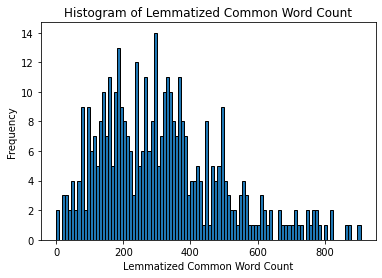

Min: 0
Q1: 176.75
Median: 292.0
Q3: 410.25
Max: 907
IQR: 233.5
Mean: 312.25970873786406


In [ ]:
lem_word_dict = text_to_count(new, "lemmatized_text")
new = count_common_occurance(new, lem_word_dict, "lemmatized_text", "Lemmatized Common Word Count", occurances = 3)
histogram_of_count(new, "Lemmatized Common Word Count", 100)

# **Attempt at splitting Questions and Answers**

In [ ]:
new["text"][0].split()



In [ ]:
sbn = new["text"][7].lower().split(":")
print(sbn)
print("At index 0 split q")
print(sbn[0].split("q."))
print("At index 1 split q")
print(sbn[1].split("q."))
print("At index 2 split q")
print(sbn[2].split("q."))
print("At index 3 split q")
print(sbn[3].split("q."))
print("At index 4 split q")
print(sbn[4].split("q."))
print("At index 5 split q")
print(sbn[5].split("q."))

['q.  talk about going to orlando.   j.j. redick', "  obviously really excited.  this is one of the teams that i circled as a destination that i would really be happy about.   i'm really looking forward to playing with some great young players down there.    q.  it seemed as if you knew that you were going to be picked by orlando there.  when did you know; did you suspect they were going to pick you?   j.j. redick", '  i had a good idea for a few days now, nothing for sure.  and i found out that it was pretty definite on the way over here.    q.  obviously very impressive orlando magic team.  what are you going to bring to orlando, and, of course, how is the back?   j.j. redick', "  well, first of all, i think i'm going to bring shooting.  i think that's one of the needs that they expressed to me.   and i'm also going to bring some intangibles, just my competitive spirit, my desire to win, all that good stuff.   and as far as the back is concerned, i've been pain-free now for two weeks

In [ ]:
print(new["text"][7])
print(new["link"][23])


Q.  Talk about going to Orlando.   J.J. REDICK:  Obviously really excited.  This is one of the teams that I circled as a destination that I would really be happy about.   I'm really looking forward to playing with some great young players down there.    Q.  It seemed as if you knew that you were going to be picked by Orlando there.  When did you know; did you suspect they were going to pick you?   J.J. REDICK:  I had a good idea for a few days now, nothing for sure.  And I found out that it was pretty definite on the way over here.    Q.  Obviously very impressive Orlando Magic team.  What are you going to bring to Orlando, and, of course, how is the back?   J.J. REDICK:  Well, first of all, I think I'm going to bring shooting.  I think that's one of the needs that they expressed to me.   And I'm also going to bring some intangibles, just my competitive spirit, my desire to win, all that good stuff.   And as far as the back is concerned, I've been pain-free now for two weeks.  I've got

In [ ]:

question_counts = []
combined_answers = []
combined_questions = []
for i, row in new.iterrows():
  #smple = row['text'].split("Q.")
  row['text'] = row['text'].lower()
  split_by_name = row['text'].lower().split(f"{row['name'].lower()}:")
  # print("Split by name")
  # print(split_by_name)

  # print("At index 0 split q")
  # print(split_by_name[0].split("q."))
  # print("At index 1 split q")
  # print(split_by_name[1].split("q."))
  # #print(smple)
  #print(split_by_name)
  #smple3 = split_by_name[7].split("Q.")
  #print(smple3)
  #print(len(split_by_name))
  answers = []
  questions = []
  #print(split_by_name)
  for index in range(0, len(split_by_name)):
    split_by_name[index]
    if index == 0:
       try:
         questions.append(split_by_name[index].split("q.")[1]) 
       except:  
          print("ERROR")
          print(questions.append( " "))
          print(row['text'])
          print(row['link'])
          print(i)
    elif index == len(split_by_name) - 1:
      answers.append(split_by_name[index].split("q.")[0])
    else:
      
      # try:
        answers.append(split_by_name[index].split("q.")[0])
        questions.append(split_by_name[index].split("q.")[1])
      # except:
      #   print("error in else answers")
      #   print(len(split_by_name))
      #   print(index)
      #   print(split_by_name[:].split("q."))
      #   print("error in else questions")
      #   print(len(split_by_name))
      #   print(index)
      #   print(f"Row number {i}")
      #   print(split_by_name[index].split("q."))
      #   print(len(split_by_name[index].split("q.")))
  #break
  question_counts.append(len(questions))
  combined_answers.append(' '.join(answers) )
  combined_questions.append(' '.join(questions))
  #for sentence in split_by_name:


  #break
#print(f"Answers ({len(answers)}) are: {answers}")
#print(f"Questions ({len(questions)}) are: {questions}")
new["Combined Answers"] = combined_answers
new["Combined Questions"] = combined_questions
new["Question Count"] = question_counts

ERROR
None

http://www.asapsports.com/show_interview.php?id=120753
229


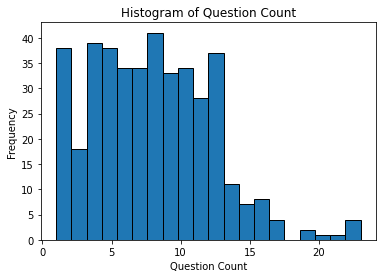

In [ ]:
column_name = 'Question Count'
column_data = new['Question Count']
plt.hist(column_data, bins=20, edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [ ]:
morethan2009 = new.where(new['year'] >= 2009)
morethan2009.where(morethan2009['year'] <= 2021).count()

name             324
year             324
text             324
link             324
QA_pair_count    324
dtype: int64

In [ ]:

print( new[new['QA_pair_count'] != new['Question Count'] ]['QA_pair_count'] )
print( new[new['QA_pair_count'] != new['Question Count'] ]['Question Count'] )
print(new['link'][56])
new[new['QA_pair_count'] != new['Question Count'] ]['text']

26      4
32      5
56      7
105     9
110     7
130    13
131     9
136    10
149    13
157     9
158     4
169    13
188    20
191    12
199     9
206     6
207    14
210    11
229     0
247    12
285     8
301     9
302     9
316    12
330     9
335    10
337    13
348    11
351    13
387     4
389    10
410    13
Name: QA_pair_count, dtype: int64
26      3
32      4
56      1
105     8
110     6
130     1
131     1
136     1
149    12
157     1
158     1
169    12
188     1
191     1
199     1
206     1
207    13
210     1
229     1
247    11
285     7
301     8
302     1
316    11
330     1
335     9
337     1
348    10
351     1
387     1
389     1
410    12
Name: Question Count, dtype: int64
http://www.asapsports.com/show_interview.php?id=50475


26     Q.  I'm curious to know how much you know abou...
32     Q.  Mike, I was wondering if you and Greg had ...
56     Q. Can you talk about your feelings getting dr...
105    Q. Chris, if you could just start with an open...
110    Q. Brandon, if you can start with an opening s...
130    Q.Ã‚Â  If you can start with your opening rema...
131    Q.Ã‚Â  If you would start with opening stateme...
136    Q.Ã‚Â  AndrÃƒÂ©, if you can start with some op...
149    Q.Ã‚Â  C.J., congratulations to you.Ã‚Â  Talk ...
157    Q.Ã‚Â  Congratulations.Ã‚Â  How are you doing?...
158    Q.Ã‚Â  Kentavious, congratulations to you.Ã‚Â ...
169    Q.Ã‚Â  Marcus, given that the Celtics already ...
188    Q.Ã‚Â  The New York Knicks are going through a...
191    Q.Ã‚Â  Tell me about your draft outfit.  KARL‑...
199    Q.Ã‚Â  Landing in Denver at 7, but there were ...
206    Q.Ã‚Â  With that outfit, did you know the Blaz...
207    Q.Ã‚Â  The Knicks are a team that has struggle...
210    Q.Ã‚Â  Can you reflect o

In [ ]:
print(new['Combined Questions'][56])
print(new['Combined Answers'][56])

 can you talk about your feelings getting drafted by new orleans?  darrel arthur: i feel great about getting drafted to new orleans. it's a great young team and they have great guys on the team like julian wright that i look up to who i can go under his wing and look up to him and just learn.    



In [ ]:
sbn = new["text"][56].lower().split(":")
print(sbn)
print("At index 0 split q")
print(sbn[0].split("q."))
print("At index 1 split q")
print(sbn[1].split("q."))
print("At index 2 split q")
print(sbn[2].split("q."))
print("At index 3 split q")
print(sbn[3].split("q."))
print("At index 4 split q")
print(sbn[4].split("q."))
print("At index 5 split q")
print(sbn[5].split("q."))

['q. can you talk about your feelings getting drafted by new orleans?  darrel arthur', " i feel great about getting drafted to new orleans. it's a great young team and they have great guys on the team like julian wright that i look up to who i can go under his wing and look up to him and just learn.    q. just talk about the range of emotions that were going through your head as you sat there waiting to be selected.   darrel arthur", " oh, i was just waiting there anxiously and just nervous that i didn't know who was going to pick me up. didn't know when i was going to be picked up, so me and my mom -- me and my family just waiting patiently and just trying to see who was going to pick us up.   i didn't work out for new orleans, so it's a blessing just to be picked up.   q. had you not fallen so far, you wouldn't have ended up with such a good team, it's like a mixed blessing; how do you feel being part of the hornets, a very, very good team in a very, very good conference?  darrel art

In [ ]:
question_counts = []
combined_answers = []
combined_questions = []

row = new.iloc[56]
#row['text'] = row['text'].lower()
split_by_name = row['text'].lower().split(f"{row['name'].lower()}:")
print(split_by_name)
print(f"{row['name'].lower()}:")
answers = []
questions = []
#print(split_by_name)
for index in range(0, len(split_by_name)):
  split_by_name[index]
  if index == 0:
        questions.append(split_by_name[index].split("q.")[1]) 

  elif index == len(split_by_name) - 1:
    answers.append(split_by_name[index].split("q.")[0])
  else:
    

      answers.append(split_by_name[index].split("q.")[0])
      questions.append(split_by_name[index].split("q.")[1])

question_counts.append(len(questions))
combined_answers.append(' '.join(answers) )
combined_questions.append(' '.join(questions))

print(combined_answers)
print(combined_questions)

["q. can you talk about your feelings getting drafted by new orleans?  darrel arthur: i feel great about getting drafted to new orleans. it's a great young team and they have great guys on the team like julian wright that i look up to who i can go under his wing and look up to him and just learn.    q. just talk about the range of emotions that were going through your head as you sat there waiting to be selected.   darrel arthur: oh, i was just waiting there anxiously and just nervous that i didn't know who was going to pick me up. didn't know when i was going to be picked up, so me and my mom -- me and my family just waiting patiently and just trying to see who was going to pick us up.   i didn't work out for new orleans, so it's a blessing just to be picked up.   q. had you not fallen so far, you wouldn't have ended up with such a good team, it's like a mixed blessing; how do you feel being part of the hornets, a very, very good team in a very, very good conference?  darrel arthur: i